In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Câu 1

Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [2]:
url = 'https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
0,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,13495.0
1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,16500.0
2,2823,152,0.822681,0.909722,154.0,19,26,94.5,2.68,16500.0
3,2337,109,0.848630,0.919444,102.0,24,30,99.8,3.19,13950.0
4,2824,136,0.848630,0.922222,115.0,18,22,99.4,3.19,17450.0
...,...,...,...,...,...,...,...,...,...,...
196,2952,141,0.907256,0.956944,114.0,23,28,109.1,3.78,16845.0
197,3049,141,0.907256,0.955556,160.0,19,25,109.1,3.78,19045.0
198,3012,173,0.907256,0.956944,134.0,18,23,109.1,3.58,21485.0
199,3217,145,0.907256,0.956944,106.0,26,27,109.1,3.01,22470.0


In [6]:
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
126,2579,132,0.872177,0.923611,104.256158,23,31,96.1,3.460000,9295.0
27,2535,122,0.839020,0.897222,88.000000,24,30,103.3,3.340000,8921.0
53,2380,70,0.812110,0.912500,101.000000,17,23,95.3,3.329751,11845.0
181,2212,109,0.825084,0.909722,85.000000,27,34,97.3,3.190000,8195.0
39,2372,110,0.842864,0.868056,86.000000,27,33,96.5,3.150000,10295.0
66,3495,183,0.901009,0.976389,123.000000,22,25,106.7,3.580000,28176.0
197,3049,141,0.907256,0.955556,160.000000,19,25,109.1,3.780000,19045.0
71,3715,304,0.957232,1.000000,184.000000,14,16,112.0,3.800000,45400.0
25,1989,90,0.755887,0.886111,68.000000,31,38,93.7,2.970000,7609.0
78,2328,122,0.831331,0.908333,88.000000,25,32,96.3,3.350000,8499.0


In [7]:
df.shape

(201, 10)

Dataset trên có 201 samples và 10 features

# Câu 2

Kiểm tra kiểu dữ liệu của các feature `curb-weight`, `engine-size`, `length`, `width`, `horsepower`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore` trong dataset có bị khuyết giá trị nào không?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  201 non-null    int64  
 1   engine-size  201 non-null    int64  
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   horsepower   201 non-null    float64
 5   city-mpg     201 non-null    int64  
 6   highway-mpg  201 non-null    int64  
 7   wheel-base   201 non-null    float64
 8   bore         201 non-null    float64
 9   price        201 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


In [9]:
print('Missing value(s): ' + str(sum(df.isnull().sum())))

Missing value(s): 0


Dữ liệu này không có missing value

# Câu 3

Phát triển mô hình Polynomial Regression bậc 3 để dự đoán giá xe từ biến `'highway-mpg'` (Tên mô hình poly).

In [10]:
# X train Poly
poly_features_c3 = PolynomialFeatures(degree=3)
X_train_c3 = df[['highway-mpg']]
X_train_c3_poly = poly_features_c3.fit_transform(X_train_c3)

# Y train
Y_train_c3 = df['price']

Model

In [11]:
p_lr_c3 = LinearRegression()
p_lr_c3.fit(X_train_c3_poly, Y_train_c3)

LinearRegression()

# Câu 4

Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly bằng phương pháp thủ công. Có thể phát họa Distribution Plot để đánh giá mô hình.

Hàm tính MSE và R^2 thủ công

In [14]:
def my_mean_squared_error(actual, predicted):
    sse = 0
    n = len(actual)
    for i in range(n):
        sse += ((actual[i] - predicted[i]) ** 2)
    
    return sse / n

def my_r2_score(actual, predicted, y_mean):
    sse_model = my_mean_squared_error(actual, predicted)
    sse_baseline = my_mean_squared_error(actual, y_mean)
    r2 = 1 - sse_model / sse_baseline
    
    return r2

Prediction

In [15]:
Y_predicted_c3 = p_lr_c3.predict(X_train_c3_poly)
Y_mean = [Y_train_c3.mean()] * len(Y_train_c3)

In [16]:
mse = my_mean_squared_error(Y_train_c3, Y_predicted_c3)
r_squared = my_r2_score(Y_train_c3, Y_predicted_c3, Y_mean)

In [18]:
print('MSE: ', mse)
print('R^2: ', r_squared)

MSE:  20474146.426361192
R^2:  0.674194666390652


Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


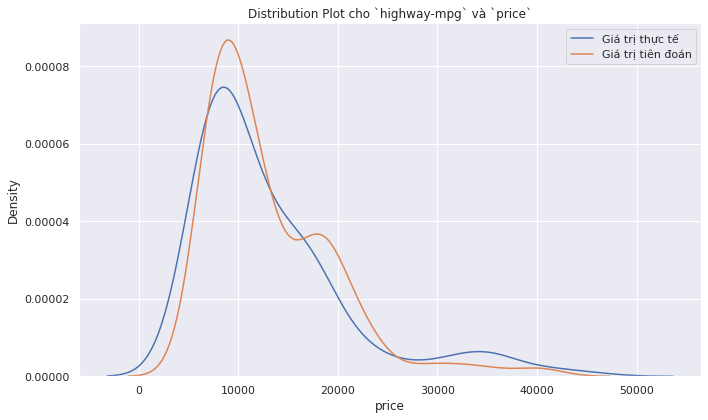

In [19]:
plt.figure(figsize=(10, 6))
sns.distplot(Y_train_c3, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted_c3, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution Plot cho `highway-mpg` và `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show();

# Câu 5

Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán `price` từ biến `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`.

In [20]:
X_train_c5 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_train_c5 = df['price']

In [21]:
lr_c5 = LinearRegression()
lr_c5.fit(X_train_c5, Y_train_c5)

LinearRegression()

In [22]:
Y_predicted_c5 = lr_c5.predict(X_train_c5)

In [24]:
Y_predicted_c5

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097, 10722.32509097, 17804.80307397,
       18063.72662867, 19320.78745066, 26968.56492801, 27674.72007721,
       28191.0677239 ,   650.62317688,  5648.50489642,  5813.27443123,
        5478.81383232,  5370.64136587,  8739.61952024,  5799.04215638,
        5902.61157827,  5902.61157827,  9036.2046829 , 11863.43973759,
       18767.70667001,  4808.3090102 ,  5693.32889063,  4006.47212651,
        6118.73075572,  6194.05397163,  6448.26982534,  6514.17763926,
        9478.65495235,  9728.16310506,  9798.77861998, 10118.90228761,
       11178.86719942, 10423.81935057,  9463.46710755, 12626.61544369,
       34470.03895495, 34470.03895495, 43996.52260522,  5265.67702191,
        5565.15645357,  5588.69495854,  5777.00299832,  5800.5415033 ,
        7337.21461795,  7337.21461795,  7360.75312292, 10536.2966792 ,
      

# Câu 6

Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?

MSE

In [25]:
print("MSE phương pháp thủ công: ", my_mean_squared_error(Y_train_c5, Y_predicted_c5))
print("MSE phương gọi hàm: ", mean_squared_error(Y_train_c5, Y_predicted_c5))

MSE phương pháp thủ công:  11980366.870726483
MSE phương gọi hàm:  11980366.87072649


R^2

In [26]:
Y_mean = [Y_train_c5.mean()] * len(Y_train_c5)
print("R2 phương pháp thủ công: ", my_r2_score(Y_train_c5, Y_predicted_c5, Y_mean))
print("R2 phương gọi hàm: ", r2_score(Y_train_c5, Y_predicted_c5))

R2 phương pháp thủ công:  0.8093562806577457
R2 phương gọi hàm:  0.8093562806577457


Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


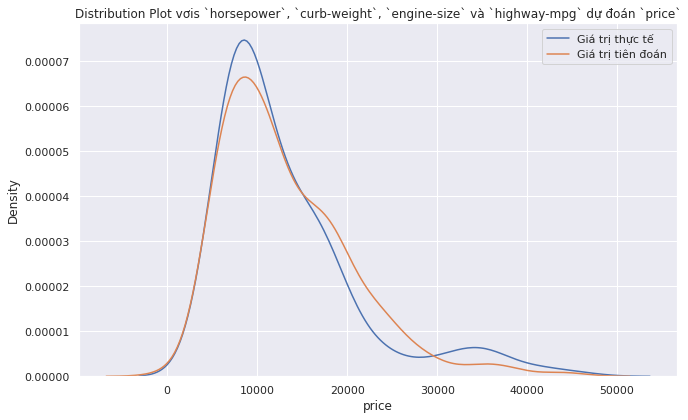

In [27]:
plt.figure(figsize=(10, 6))
sns.distplot(Y_train_c5, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted_c5, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution Plot vơis `horsepower`, `curb-weight`, `engine-size` và `highway-mpg` dự đoán `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show();

# Câu 7

Phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`.

In [28]:
poly_features_c7 = PolynomialFeatures(degree=2)
X_train_c7 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
X_train_c7_poly = poly_features_c7.fit_transform(X_train_c7)
Y_train_c7 = df['price']

Model

In [29]:
p_lr_c7 = LinearRegression()
p_lr_c7.fit(X_train_c7_poly, Y_train_c7)

LinearRegression()

In [30]:
Y_predicted_c7 = p_lr_c7.predict(X_train_c7_poly)

# Câu 8

Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa **Distribution Plot** để đánh giá mô hình được không?

MSE

In [31]:
print("MSE phương pháp thủ công: ", my_mean_squared_error(Y_train_c7, Y_predicted_c7))
print("MSE phương gọi hàm: ", mean_squared_error(Y_train_c7, Y_predicted_c7))

MSE phương pháp thủ công:  9656613.403989585
MSE phương gọi hàm:  9656613.40398959


R^2

In [33]:
Y_mean = [Y_train_c7.mean()] * len(Y_train_c7)
print("R2 phương pháp thủ công: ", my_r2_score(Y_train_c7, Y_predicted_c7, Y_mean))
print("R2 phương gọi hàm: ", r2_score(Y_train_c7, Y_predicted_c7))

R2 phương pháp thủ công:  0.8463341969864729
R2 phương gọi hàm:  0.8463341969864729


Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


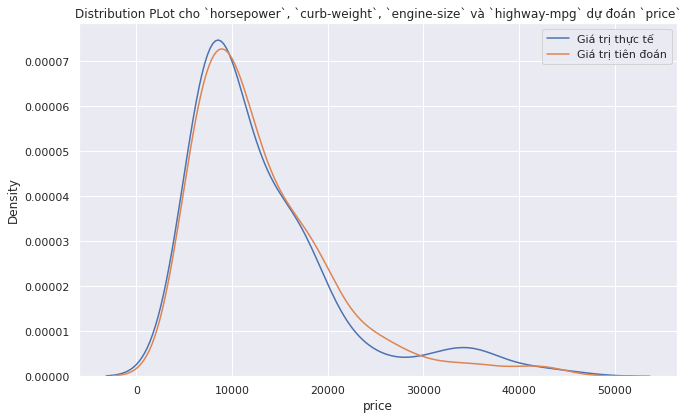

In [34]:
plt.figure(figsize=(10, 6))
sns.distplot(Y_train_c7, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted_c7, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution PLot cho `horsepower`, `curb-weight`, `engine-size` và `highway-mpg` dự đoán `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.legend()
plt.show();

# Câu 9

Thiết kế một *pipeline* để phát triển mô hình mô hình **Polynomial Regression bậc 2** để dự đoán giá xe từ biến `horsepower`, `curb-weight`, '`engine-size`, `highway-mpg`. Trong *pipeline* thực hiện các công việc sau:
* __Normalize__
* __Transformation $\Rightarrow$ Feature__
* __LinearRegression để Fit tìm mô hình. Xuất mô hình vừa tìm được__

In [35]:
X_train_c9 = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y_train_c9 = df['price']

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('transform', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())]
)

In [37]:
pipeline.fit(X_train_c9, Y_train_c9)

Pipeline(steps=[('scaler', StandardScaler()),
                ('transform', PolynomialFeatures()),
                ('model', LinearRegression())])

In [38]:
Y_predicted_c9 = pipeline.predict(X_train_c9)

In [39]:
Y_predicted_c9

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

__Score:__

In [40]:
print('Training Set Score: ', pipeline.score(X_train_c9, Y_train_c9))
print('Training MSE: ', mean_squared_error(Y_train_c9, Y_predicted_c9))
print('Training R-Squared: ', r2_score(Y_train_c9, Y_predicted_c9))

Training Set Score:  0.8463341969864728
Training MSE:  9656613.403989598
Training R-Squared:  0.8463341969864728


# Câu 10

Tìm khoảng giá trị chặn của các mô hình.

In [41]:
print('Giá trị Y (`price`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      Y_predicted_c3.min())
print('Giá trị Y (`price`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      Y_predicted_c3.max())

print('Giá trị X (`highway-mpg`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      X_train_c3['highway-mpg'].min())
print('Giá trị X (`highway-mpg`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là: ',
      X_train_c3['highway-mpg'].max())

Giá trị Y (`price`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  5739.271085866087
Giá trị Y (`price`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  40517.7757856602
Giá trị X (`highway-mpg`) chặn dưới của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  16
Giá trị X (`highway-mpg`) chặn trên của mô hình p3_lr (Polynominal 3 Regression) - câu 3 là:  54


## Câu 11

Xếp hạng các mô hình đã phát triển các câu trên.

In [42]:
names = [
    'Câu 3',
    'Câu 5',
    'Câu 7',
    'Câu 9'
]
model_names = [
    'Polynomial Linear Regression',
    'Multivariable Linear Regression',
    'Multivariable Linear Regression bậc 2',
    'Multivariable Linear Regression Pipeline bậc 2'
]
used_features = [
    '`highway-mpg`',
    '`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`',
    '`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`',
    '`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`'
]
models = [
    p_lr_c3,
    lr_c5,
    p_lr_c7,
    pipeline
]
mses = [
    mean_squared_error(Y_train_c3, Y_predicted_c3),
    mean_squared_error(Y_train_c5, Y_predicted_c5),
    mean_squared_error(Y_train_c7, Y_predicted_c7),
    mean_squared_error(Y_train_c9, Y_predicted_c9)
]
r2s = [
    r2_score(Y_train_c3, Y_predicted_c3),
    r2_score(Y_train_c5, Y_predicted_c5),
    r2_score(Y_train_c7, Y_predicted_c7),
    r2_score(Y_train_c9, Y_predicted_c9)
]

In [43]:
model_comparison = pd.DataFrame({'Câu': names,
                                 'Tên Model': model_names,
                                 'Các features sử dụng': used_features,
                                 'Model': models,
                                 'MSE': mses,
                                 'R2': r2s})

In [44]:
model_comparison

,Câu,Tên Model,Các features sử dụng,Model,MSE,R2
0,Câu 3,Polynomial Linear Regression,`highway-mpg`,LinearRegression(),2.047415e+07,0.674195
1,Câu 5,Multivariable Linear Regression,"`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`",LinearRegression(),1.198037e+07,0.809356
2,Câu 7,Multivariable Linear Regression bậc 2,"`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`",LinearRegression(),9.656613e+06,0.846334
3,Câu 9,Multivariable Linear Regression Pipeline bậc 2,"`horsepower`, `curb-weight`, `engine-size`, `highway-mpg`","(StandardScaler(), PolynomialFeatures(), LinearRegression())",9.656613e+06,0.846334
